# Network Intrusion Detection - Data Preprocessing & Feature Slection

#### After the EDA, we performed some standard data preprocessing techniques. It was done wherever we felt that it would affect our process.

#### In this part, we will fo these methods:

- Data Preprocessing - drop duplicates, handling missing values, finding outliers etc. Meanwhile, encoding the catagorical data and normalize the data.

- Feature Selection - Removing redundant features or selecting the most "useful" features. We used recursive feature elimination for feature selection.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# for normalization
from sklearn.preprocessing import StandardScaler
# for encoding
from sklearn.preprocessing import LabelEncoder
# for feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# for model selection and training
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# for feature selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

df = pd.read_csv('/Users/mengchuli/Documents/Security_Analytics/final_project/intrusion-classification/training.csv')

# *1 Data Preprocessing*

## 1.1 Data Cleaning
First of all, we want to drop thoese useless columns and to check whether there are any duplicate values in our dataset. If there is any, we will need to drop them.

In [2]:
df.shape

(449940, 43)

In [3]:
# "Id" column looks like useless, drop it.
del df['Id']

In [4]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,private,REJ,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.0,0.00,1.0,1.0,0
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,0
2,0,tcp,http,SF,302,1023,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1
3,0,udp,ntp_u,SF,48,48,0,0,0,0,...,9,0.08,0.02,0.08,0.00,0.0,0.00,0.0,0.0,1
4,0,tcp,http,SF,334,2096,0,0,0,0,...,255,1.00,0.00,0.03,0.03,0.0,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449935,0,tcp,http,SF,215,3205,0,0,0,0,...,163,1.00,0.00,0.10,0.06,0.0,0.01,0.0,0.0,1
449936,1180,udp,other,SF,147,105,0,0,0,0,...,1,0.00,0.67,0.94,0.00,0.0,0.00,0.0,0.0,1
449937,0,tcp,http,SF,212,3542,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.0,0.00,0.0,0.0,1
449938,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,0


In [5]:
# drop duplicates
sum(df.duplicated(df.columns))
df = df.drop_duplicates(df.columns, keep='last')
df = df.reset_index(drop=True)
df.shape

(235464, 42)

Now, Let's look into details.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235464 entries, 0 to 235463
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     235464 non-null  int64  
 1   protocol_type                235464 non-null  object 
 2   service                      235464 non-null  object 
 3   flag                         235464 non-null  object 
 4   src_bytes                    235464 non-null  int64  
 5   dst_bytes                    235464 non-null  int64  
 6   land                         235464 non-null  int64  
 7   wrong_fragment               235464 non-null  int64  
 8   urgent                       235464 non-null  int64  
 9   hot                          235464 non-null  int64  
 10  num_failed_logins            235464 non-null  int64  
 11  logged_in                    235464 non-null  int64  
 12  num_compromised              235464 non-null  int64  
 13 

After browsing the information of dataset, we want to see if there are any missing values in the dataset, so before prediction, we should clean these rows in the data table.

In [7]:
variables = df.columns

data = []
for variable in variables:
    l = df[variable].count()
    data.append(l)
available_per = np.round(pd.Series(data)/len(df), 3)

In [8]:
available_per == 1.0

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
dtype: bool

From the available percentage of data, we can see that all the features are 100% full of excat values, so we skip this step.

In [9]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
count,235464.000000,2.354640e+05,2.354640e+05,235464.000000,235464.000000,235464.000000,235464.000000,235464.000000,235464.000000,235464.000000,...,235464.000000,235464.000000,235464.000000,235464.000000,235464.000000,235464.000000,235464.000000,235464.000000,235464.000000,235464.000000
mean,140.371360,3.654130e+03,3.627808e+03,0.000038,0.000713,0.000021,0.077311,0.001869,0.731216,0.061092,...,187.128538,0.786191,0.045092,0.110826,0.024205,0.042885,0.042296,0.099786,0.097800,0.934308
std,1266.381212,4.594754e+05,5.271162e+04,0.006182,0.040692,0.005452,1.225303,0.043871,0.443328,15.852534,...,98.507433,0.363795,0.144631,0.252989,0.057898,0.196689,0.198604,0.291052,0.289511,0.389891
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,106.000000,0.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,2.320000e+02,4.760000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,3.130000e+02,2.265000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.030000,0.050000,0.030000,0.000000,0.000000,0.000000,0.000000,1.000000
max,54451.000000,2.172773e+08,7.068759e+06,1.000000,3.000000,2.000000,101.000000,3.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


Finally, check the outliers in our datasets, let's first look into the column target.

### Target

In this section, we are encoding the target class to 0s and 1s, so that it can be used for further analysis and training:

0 for "normal" connections -- target = 1;

1 for "anomaly" connections -- target in {0,2,3,4};

In [10]:
import warnings
warnings.filterwarnings('ignore')

# map nomarl with 0, inrusion attack with 1
df['target'] = df['target'].apply(lambda x: 0 if x==1  else 1)

# tg = df['target']
# for idx in range(len(tg)):
#     if tg[idx] == 1:
#         df['target'][idx] = 0
#     else:
#         df['target'][idx] = 1

In [11]:
import os 
import warnings
import gc

import pandas as pd 
import numpy as np 
from plotly.subplots import make_subplots
import plotly.express as px 
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report

class_count = pd.DataFrame(df['target']).value_counts()
fig = go.Figure()
fig.add_trace(go.Pie(
    labels=class_count.index,
    values=class_count
))
fig.update_traces(textposition='inside') 
fig.update_layout(
    title=f"Pie Chart of Groundtruths",
    uniformtext_minsize=12, 
    uniformtext_mode='hide'
)
fig.show()

### Features

In this section, we are trying to find outlier in feature values. Such as deleting the extranous 2 in feature only has 0 or 1. 

Based on the discribe data bafore. We first compute a table for each seemingly anomaly feature(like su_attemped with a max value 2), group by the different feature values and their corresponding target type counts. From this table, we could easily find the outliers and delete them.

In [12]:
df[["su_attempted", "target"]].groupby(['su_attempted'], as_index=False).count().sort_values(by='su_attempted', ascending=True)

,su_attempted,target
0,0,235435
1,1,14
2,2,15


From the table, wo can see that there exist outliers "2" in __su_attempted__ feature, so we delete them.

In [13]:
df = df[df['su_attempted'] != 2] 

In [14]:
df[["is_guest_login", "target"]].groupby(['is_guest_login'], as_index=False).count().sort_values(by='target', ascending=False)


,is_guest_login,target
0,0,233880
1,1,1569


In [15]:
df[["num_compromised", "target"]].groupby(['num_compromised'], as_index=False).count().sort_values(by='num_compromised', ascending=True)


,num_compromised,target
0,0,234954
1,1,366
2,2,46
3,3,27
4,4,20
5,5,5
6,6,7
7,7,3
8,9,3
9,10,2


Delete outlier "7479" in __num_compromised__ feature.

In [16]:
df = df[df['num_compromised'] != 7479] 

In [17]:
df[["num_root", "target"]].groupby(['num_root'], as_index=False).count().sort_values(by='num_root', ascending=True)


,num_root,target
0,0,234316
1,1,505
2,2,31
3,3,1
4,4,18
5,5,41
6,6,236
7,9,291
8,10,1
9,17,1


In [18]:
df[["src_bytes", "target"]].groupby(['src_bytes'], as_index=False).count().sort_values(by='src_bytes', ascending=True)


,src_bytes,target
0,0,32854
1,1,474
2,2,1
3,4,6
4,5,42
...,...,...
4410,7847476,1
4411,11396904,1
4412,14584085,1
4413,24418776,1


Delete outlier "217277339" in __num_compromised__ feature.

In [19]:
df = df[df['src_bytes'] != 217277339] 

In [20]:
df[["hot", "target"]].groupby(['hot'], as_index=False).count().sort_values(by='hot', ascending=True)


,hot,target
0,0,233081
1,1,371
2,2,864
3,3,32
4,4,234
5,5,86
6,6,195
7,7,16
8,9,3
9,10,1


Delete outlier "101" in __hot__ feature.

In [21]:
df = df[df['hot'] != 101] 

In [22]:
df[["num_root", "target"]].groupby(['num_root'], as_index=False).count().sort_values(by='num_root', ascending=True)


,num_root,target
0,0,234314
1,1,505
2,2,31
3,3,1
4,4,18
5,5,41
6,6,236
7,9,291
8,10,1
9,17,1


Delete outlier "401" in __num_root__ feature.

In [23]:
df = df[df['num_root'] != 401] 

In [24]:
df[["num_outbound_cmds", "target"]].groupby(['num_outbound_cmds'], as_index=False).count().sort_values(by='num_outbound_cmds', ascending=True)


,num_outbound_cmds,target
0,0,235445


In [25]:
# 'num_outbound_cmds' are redundant column so remove it from data.
df.drop(['num_outbound_cmds'], axis=1, inplace=True)

Here, we found that __num_outbound_cmds__ have only one unique value i.e., 0. This introduces redundancy, as a feature with only 1 value won't affect our model. We can remove it and reduce the size of the data and hence improve the training process.

In [26]:
df[["count", "target"]].groupby(['count'], as_index=False).count().sort_values(by='count', ascending=True)


,count,target
0,0,5
1,1,65613
2,2,20658
3,3,12967
4,4,11244
...,...,...
494,507,18
495,508,59
496,509,206
497,510,197


In [27]:
df[["srv_count", "target"]].groupby(['srv_count'], as_index=False).count().sort_values(by='srv_count', ascending=True)


,srv_count,target
0,0,5
1,1,48151
2,2,26474
3,3,14450
4,4,11463
...,...,...
478,507,16
479,508,27
480,509,68
481,510,86


## 1.2 Data Encoding & Data Normalization

Encoding the catagorical data.

- Data Encoding - Most of the models cannot process strings/objects. So the data needs to be transformed to numerical data. This process is known as data encoding(also data transformation)

- Data Scaling and Normalization - Scaling or Normalisation is common preprocessing technique used in machine learning where the data is ususally normalised to a scale of 0 to 1.

In [28]:
# Custom Label Encoder for handling unknown values
class LabelEncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data):
        self.label_encoder = self.label_encoder.fit(list(data) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data):
        new_data = list(data)
        for unique_item in np.unique(data):
            if unique_item not in self.label_encoder.classes_:
                new_data = ['Unknown' if x==unique_item else x for x in new_data]
        return self.label_encoder.transform(new_data)

In [29]:
X, y = df.iloc[:, :-1], df['target']

In [30]:
le = LabelEncoderExt()

# encode the selected columns
for col in X.select_dtypes("object"):
    le.fit(X[col])
    X[col] = le.transform(X[col])


Normalizing the numerical data.

In [31]:
scaler = StandardScaler()
# store the columns
cols = X.columns

# transform the data
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = cols)

In [32]:
new_df = X.join(y)
#new_df.to_csv('data_cleaned.csv',index=False)

# *2 Feature Selection*

Next, let's do the feature selection part. In this part, we gonna:

- Removing redundant features or selecting the most "useful" features. We used recursive feature elimination for feature selection.
- Ranking the features using different approaches.
- Further process the data by RFE based on Random Forest.

## 2.1 Heatmap

<AxesSubplot:>

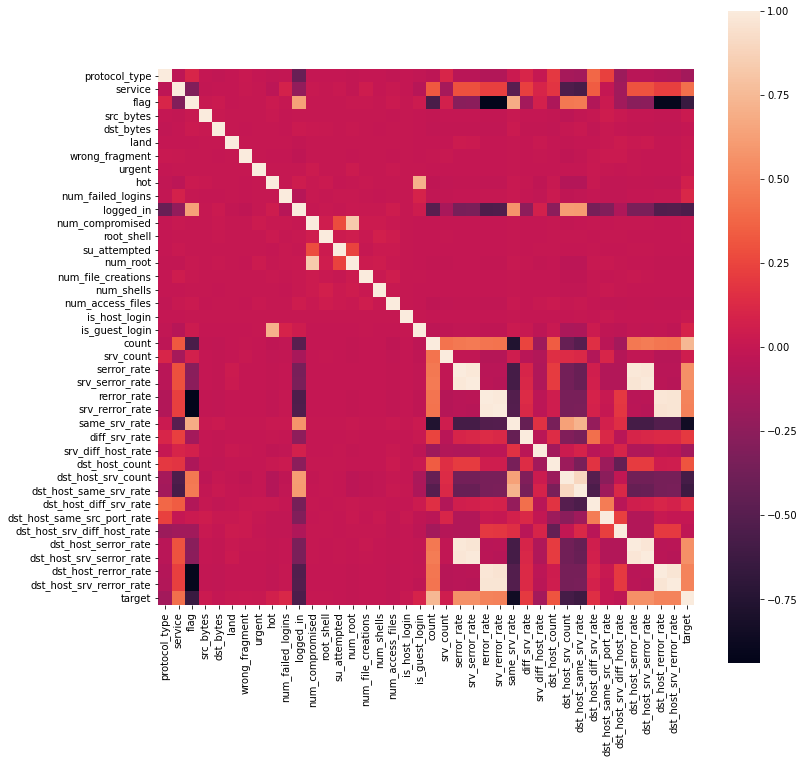

In [33]:
# draw correlation heatmap
corr = new_df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

## 2.2 Sorting Correlation Table

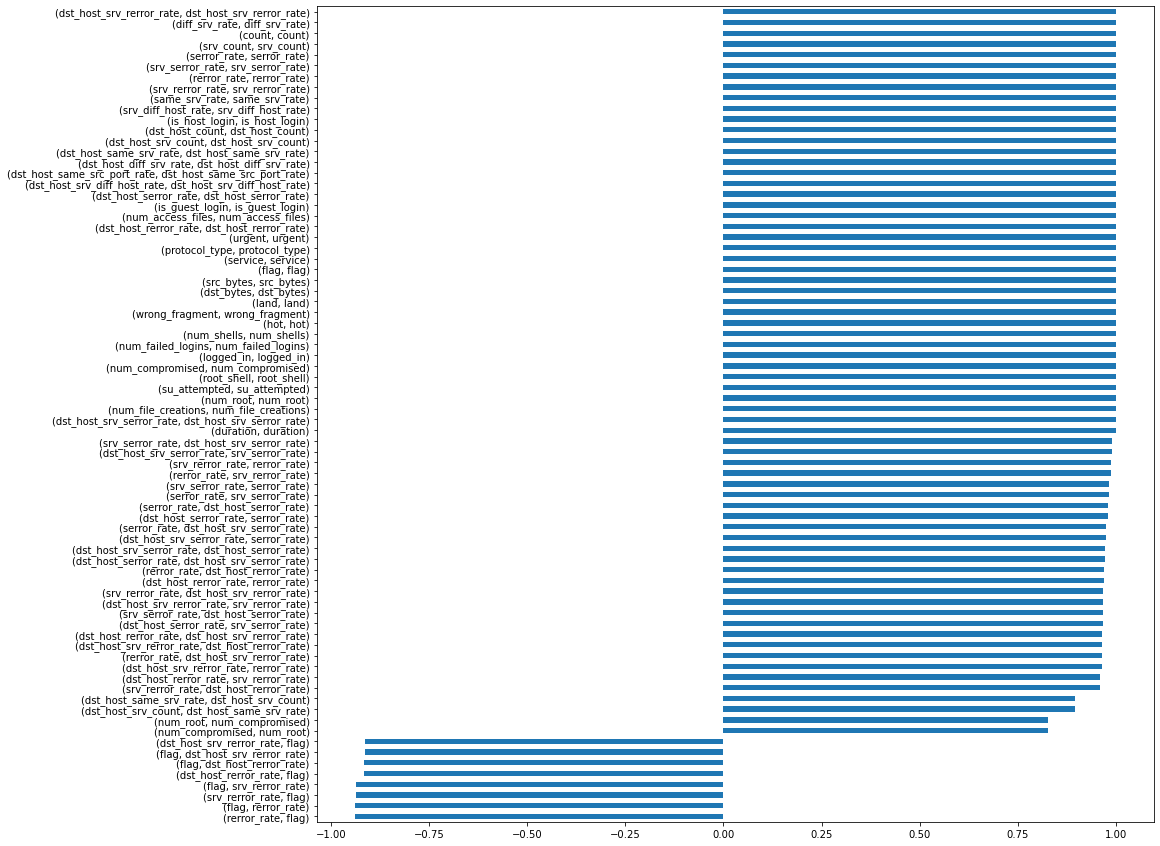

In [34]:
X, y = new_df.drop(['target'], axis=1), new_df['target']
corr_mat = X.corr()
sorted_pairs = corr_mat.unstack().sort_values(kind="quicksort")
strong_corr = sorted_pairs[abs(sorted_pairs) > 0.8]
strong_corr.plot(kind="barh", figsize=(15, 15))
plt.show()

From the above bar graph, we can see there are so many difference pairs features with strong correlations, it is not easy to handle these pairs of features one by one using PCA. which is also not a efficient way to get important features. Then we are trying to implement some feature selections techniques to find the most important features. 

## 2.3 Feature Seletion Using Random Forest

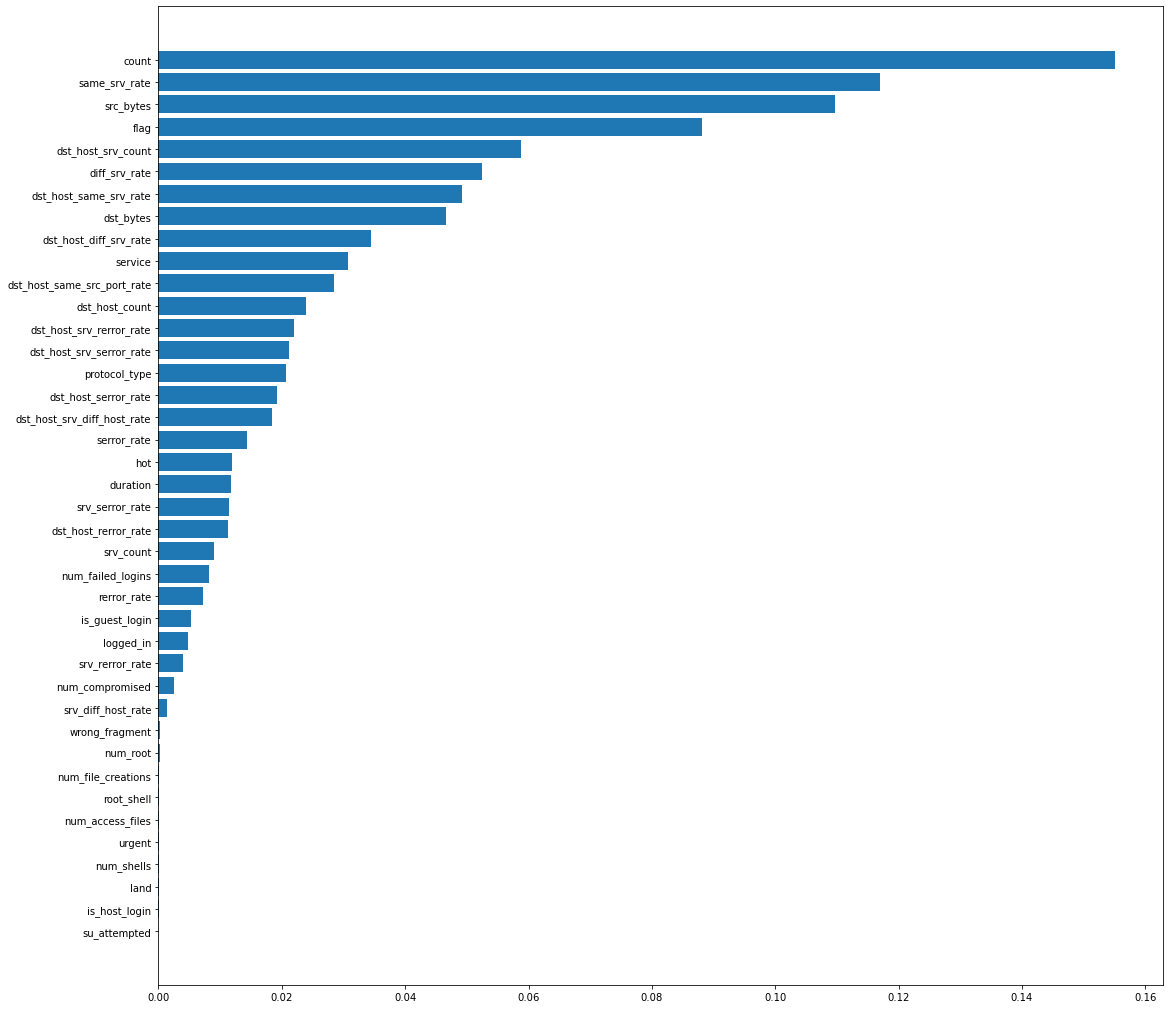

In [35]:
#X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.3)
features = X.columns
rf = RandomForestClassifier(random_state=0) 
rf.fit(X,y)
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.figure(figsize=(18, 18))
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()


## 2.4 Univariate Feature Selection

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
X, y = new_df.drop(['target'], axis=1), new_df['target']
bestfeatures = SelectKBest(score_func=chi2, k=40)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] 
print(featureScores.nlargest(40,'Score'))

                       Features         Score
4                     src_bytes  7.694078e+08
21                        count  2.153583e+07
5                     dst_bytes  6.923755e+06
31           dst_host_srv_count  4.248411e+06
30               dst_host_count  1.590108e+06
2                       service  1.927078e+05
3                          flag  7.248479e+04
37     dst_host_srv_serror_rate  6.821255e+04
24              srv_serror_rate  6.718275e+04
23                  serror_rate  6.696301e+04
36         dst_host_serror_rate  6.585238e+04
25                  rerror_rate  5.117645e+04
26              srv_rerror_rate  5.045001e+04
39     dst_host_srv_rerror_rate  5.002377e+04
38         dst_host_rerror_rate  4.950722e+04
22                    srv_count  4.811785e+04
0                      duration  3.646377e+04
11                    logged_in  1.900785e+04
9                           hot  1.796482e+04
27                same_srv_rate  1.570051e+04
32       dst_host_same_srv_rate  1

## 2.5 Select the Best set of features according to RFE 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

## Standardize the data
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

## Fix dimensionality issue
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

forest = RandomForestClassifier()
_ = forest.fit(X_train_std, y_train)
forest.score(X_test_std, y_test)

pd.DataFrame(
    zip(X_train.columns, abs(forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)


,feature,weight
0,is_host_login,0.000000
1,su_attempted,0.000008
2,urgent,0.000022
3,land,0.000024
4,num_shells,0.000054
5,num_access_files,0.000057
6,root_shell,0.000067
7,num_file_creations,0.000102
8,num_root,0.000159
9,wrong_fragment,0.000292


Removing features with close to 0 weights, see from the above there are many features close to 0. 

In [38]:
rfe = RFE(estimator=RandomForestClassifier(), 
          n_features_to_select=10, step=10)
_ = rfe.fit(X_train_std, y_train)

print(X_train.columns[rfe.support_])


Index(['service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate'],
      dtype='object')


In [53]:
selected = ['service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate', 'dst_host_diff_srv_rate']

In [54]:
scaler = StandardScaler()
# store the columns
cols = X.columns

# transform the data
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = cols)

In [55]:
df_scaled = X_scaled.join(y, how = 'outer')
df_scaled.to_csv('data_scaled.csv',index=False)
cle_fea = df_scaled[selected]
cle_df = cle_fea.join(y, how='outer')
cle_df.to_csv('data_scaled_wbset10.csv',index=False)

In [56]:
cle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235464 entries, 0 to 235463
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   service                   235445 non-null  float64
 1   flag                      235445 non-null  float64
 2   src_bytes                 235445 non-null  float64
 3   dst_bytes                 235445 non-null  float64
 4   count                     235445 non-null  float64
 5   same_srv_rate             235445 non-null  float64
 6   diff_srv_rate             235445 non-null  float64
 7   dst_host_srv_count        235445 non-null  float64
 8   dst_host_srv_serror_rate  235445 non-null  float64
 9   dst_host_diff_srv_rate    235445 non-null  float64
 10  target                    235445 non-null  float64
dtypes: float64(11)
memory usage: 21.6 MB


In [57]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235464 entries, 0 to 235463
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     235445 non-null  float64
 1   protocol_type                235445 non-null  float64
 2   service                      235445 non-null  float64
 3   flag                         235445 non-null  float64
 4   src_bytes                    235445 non-null  float64
 5   dst_bytes                    235445 non-null  float64
 6   land                         235445 non-null  float64
 7   wrong_fragment               235445 non-null  float64
 8   urgent                       235445 non-null  float64
 9   hot                          235445 non-null  float64
 10  num_failed_logins            235445 non-null  float64
 11  logged_in                    235445 non-null  float64
 12  num_compromised              235445 non-null  float64
 13 

In [ ]:
pd.c